In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

**Making Synthetic Dataset**

In [2]:
X,y = make_classification(n_samples=1000, n_clusters_per_class=1,n_features=2,n_redundant=0)

In [3]:
X

array([[-1.22494897, -1.47099042],
       [ 0.63223119,  0.51613789],
       [ 0.08031965, -0.39003519],
       ...,
       [-1.55162312, -1.43227876],
       [ 1.53308661,  2.10347817],
       [-0.28171186, -0.63650693]])

<Axes: xlabel='0', ylabel='1'>

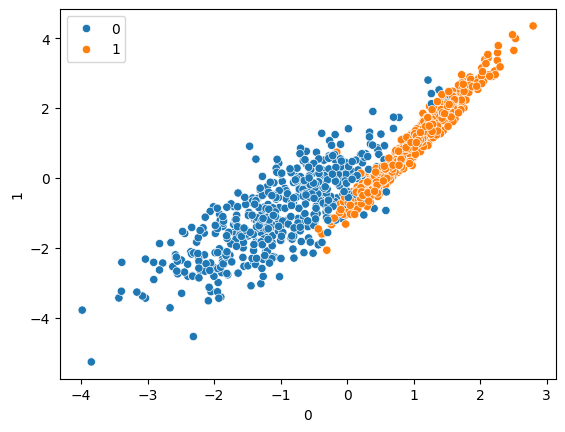

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

**Train Test Split **

In [5]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# **Hyper Parameter Tuning of SVC**

In [6]:
svc=SVC()

In [10]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,], 'kernel':['rbf','poly','sigmoid']}

In [11]:
grid=GridSearchCV(SVC(),param_grid=param_grid,verbose=3,cv=5)

In [12]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.869 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.844 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [14]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [15]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [16]:
grid.best_score_

0.9574999999999999

In [17]:
y_pred=grid.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.95      0.99      0.97        95

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

[[100   5]
 [  1  94]]
